# GeoBench EverWatch

In [ ]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchEverWatchDataModule
from geobench_v2.datasets import GeoBenchEverWatch
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compare_normalization_methods,
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
)

%load_ext autoreload
%autoreload 2

In [ ]:
PROJECT_ROOT = Path("../../")

STATS_SATMAE_PATH = os.path.join(
    PROJECT_ROOT, "data", "substation", "substation_stats_satmae.json"
)
STATS_CLIP_RESCALE_PATH = os.path.join(
    PROJECT_ROOT, "data", "substation", "substation_stats_clip_rescale.json"
)

In [ ]:
band_order = GeoBenchEverWatch.band_default_order

datamodule = GeoBenchEverWatchDataModule(
    img_size=256,
    batch_size=16,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "substation",
    band_order=band_order,
    data_normalizer=torch.nn.Identity(),  # we do custom normalization in the tutorial
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


## Dataset Statistics

Computed over the training dataset.

### Image Statistics

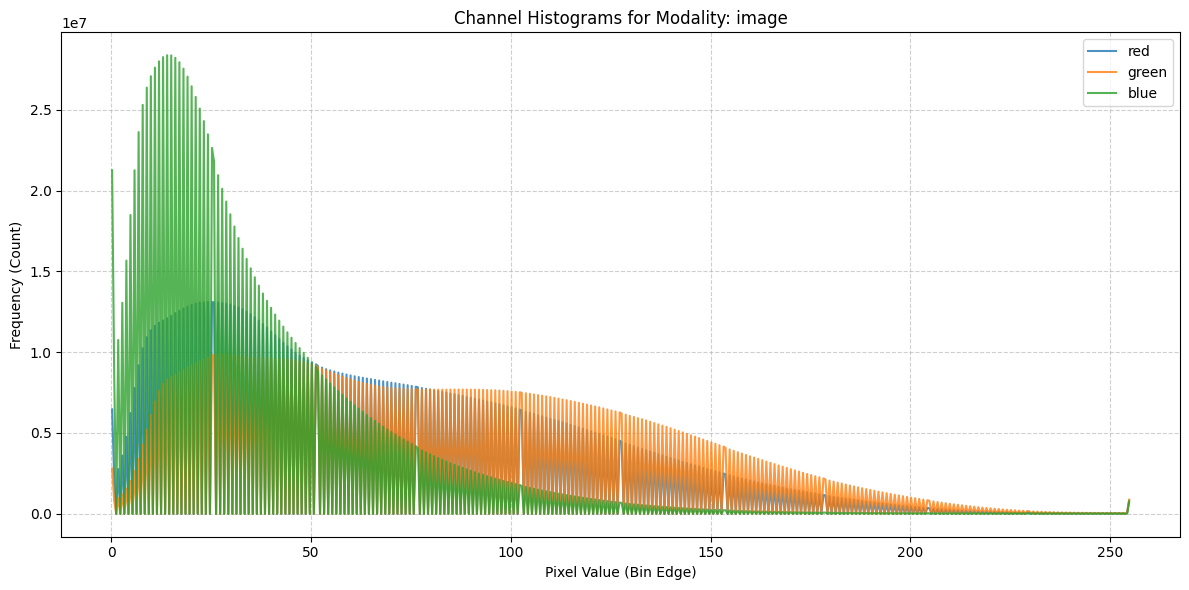

In [4]:
fig = plot_channel_histograms(STATS_SATMAE_PATH)

### Target Statistics

In [ ]:
# fig = visualize_object_detection_target_statistics(STATS_SATMAE_PATH, "EverWatch")

NameError: name 'visualize_object_detection_target_statistics' is not defined

### Raw Batch Statistics

[<Figure size 1200x500 with 1 Axes>]

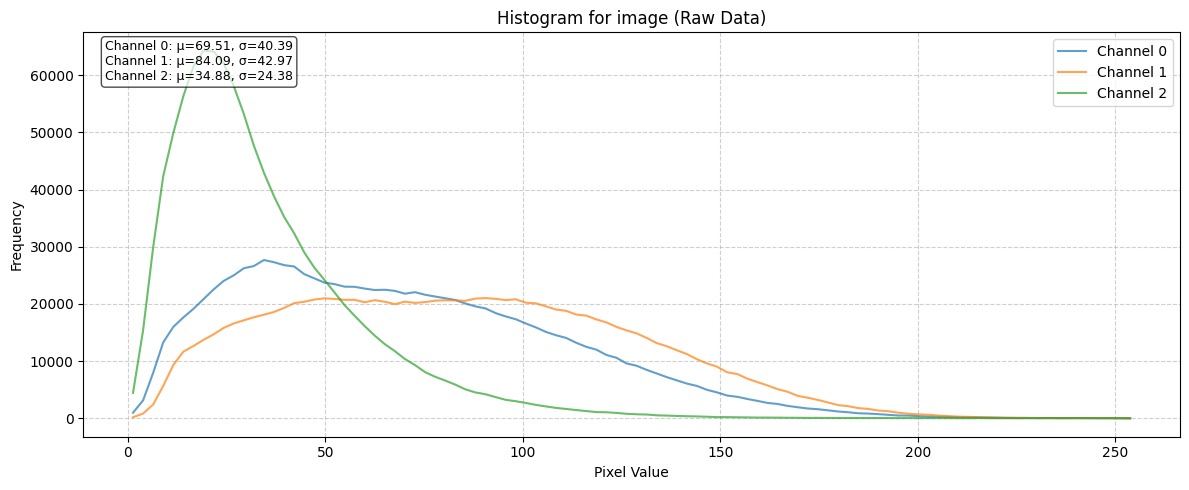

In [6]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

### Effect of different Normalization Schemes

In [ ]:
zscore_normalizer = ZScoreNormalizer(STATS_CLIP_RESCALE_PATH, band_order)
satmae_normalizer = SatMAENormalizer(STATS_SATMAE_PATH, band_order)

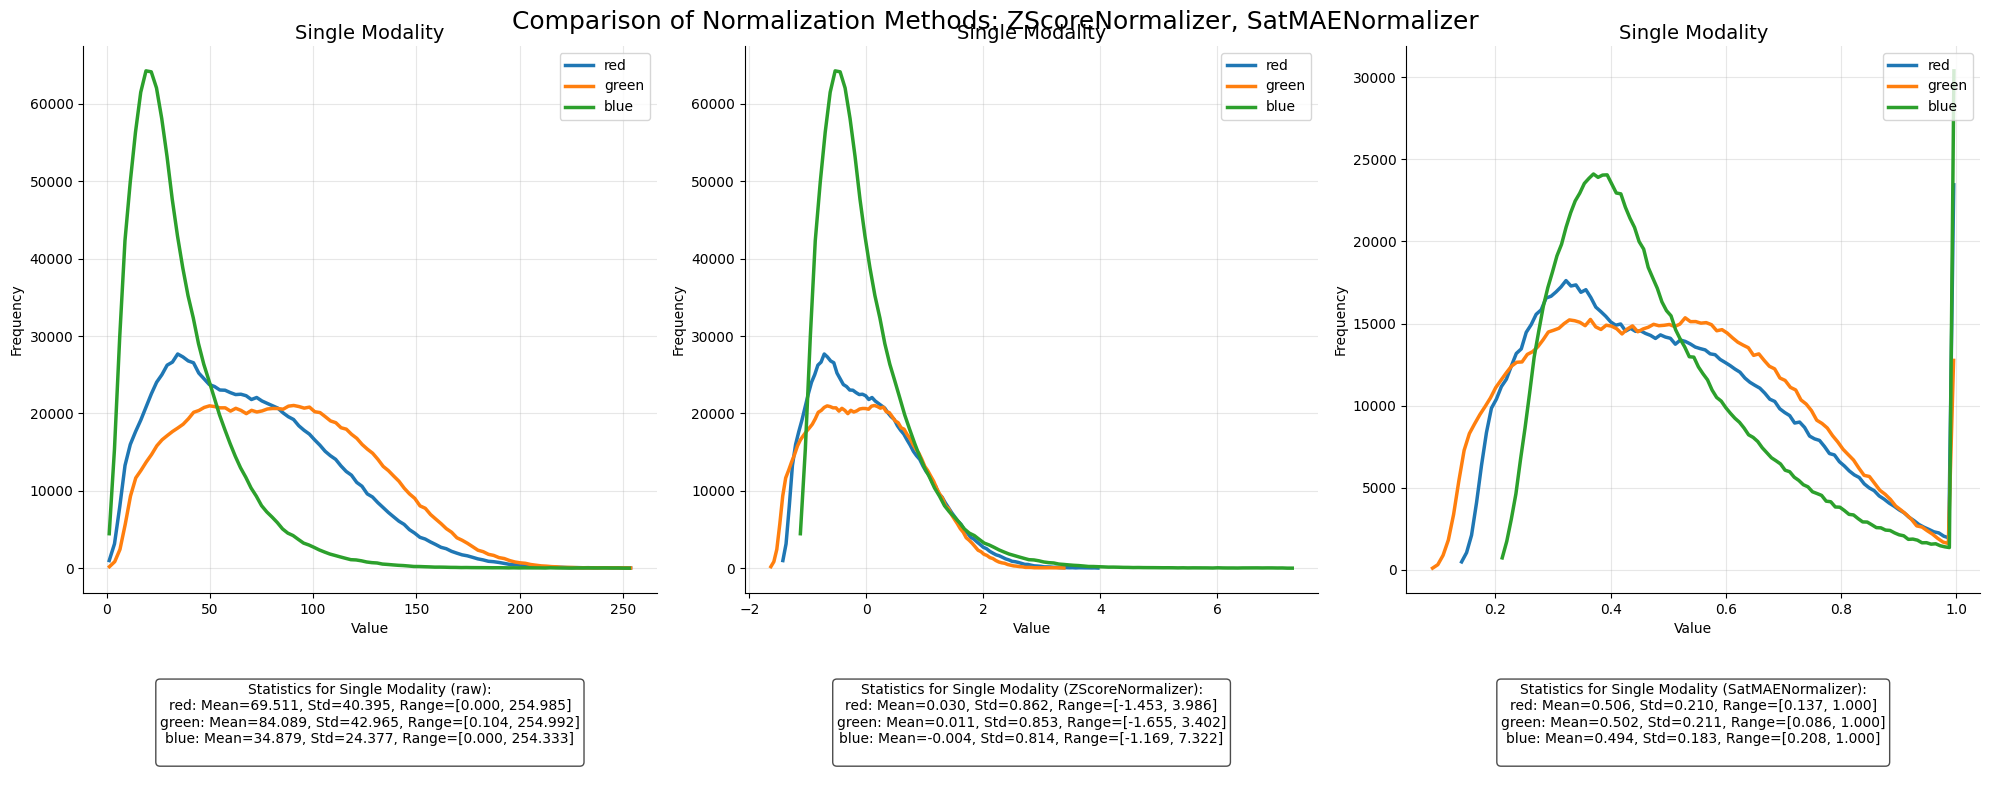

In [8]:
norm_fig, normalized_batches = compare_normalization_methods(
    raw_batch, [zscore_normalizer, satmae_normalizer], datamodule
)

## Visualize Batch Data

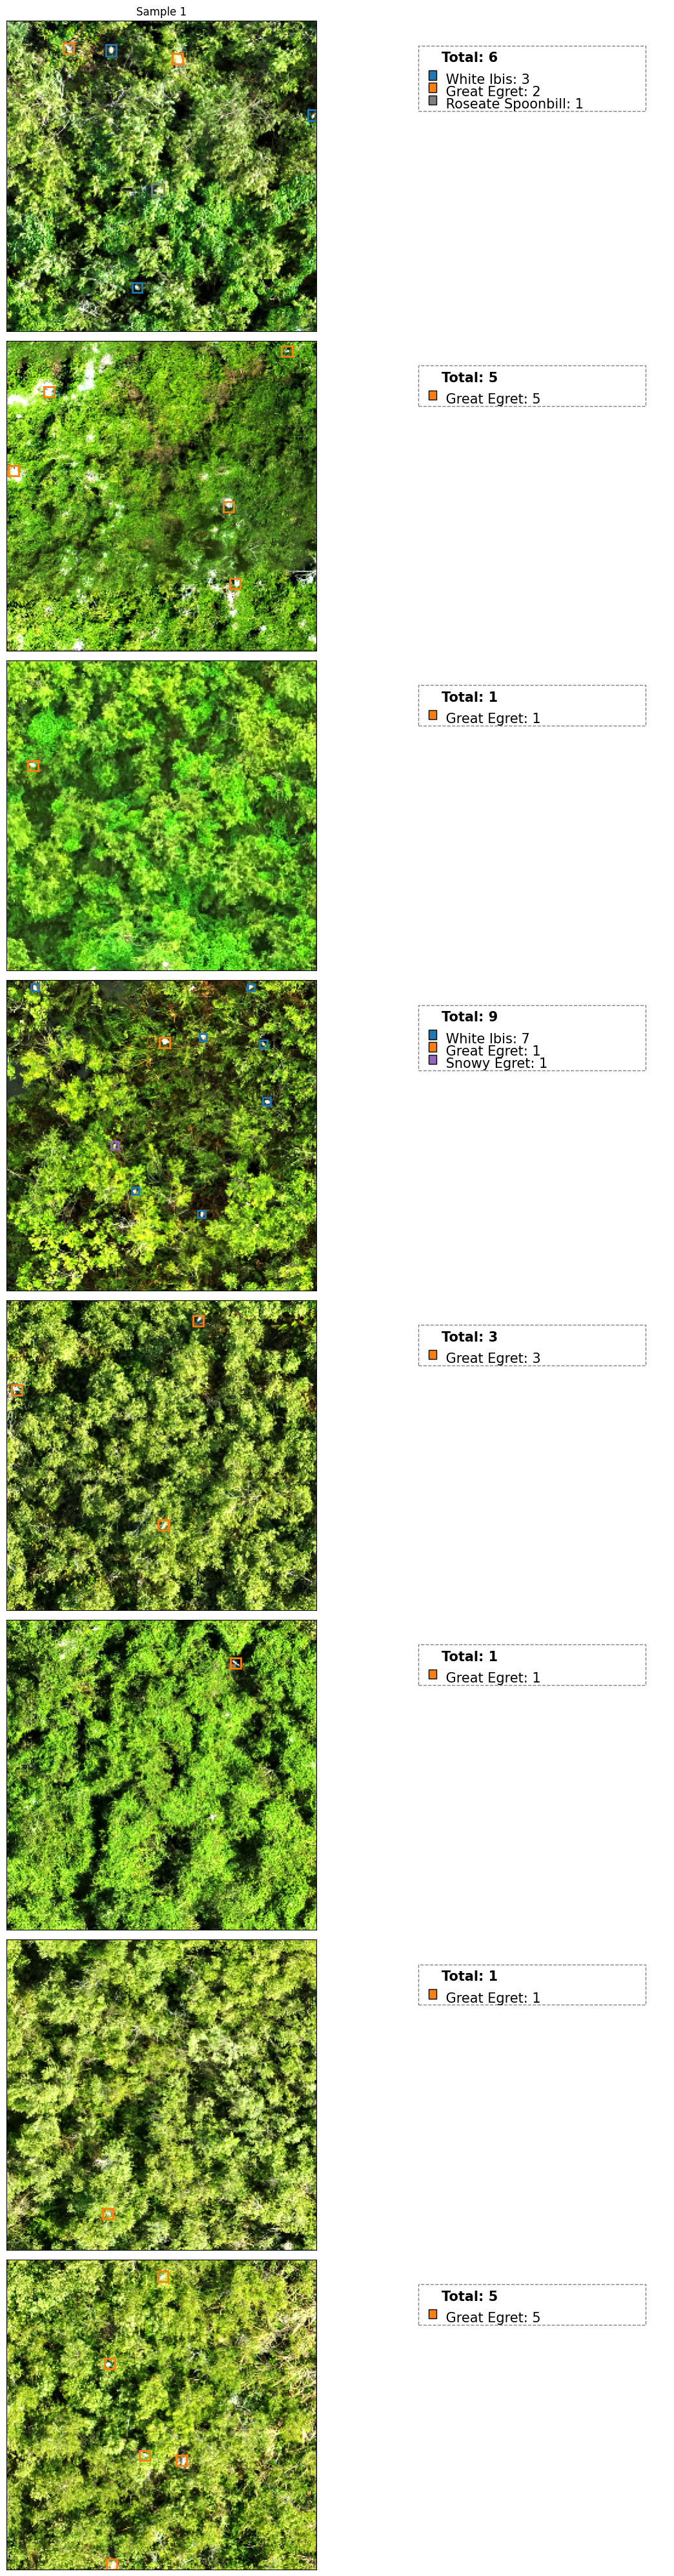

In [ ]:
fig, batch = datamodule.visualize_batch()